**Assignment 1** for the course of *Selected Topics in Music and Acoustic Engineering* : 

***Machine Learning for Audio and Acoustic Engineering*** 

helded by Professor *Maximo Cobos*.

---

STUDENTS GROUP:

+ **Fotios Koutsoukos**, ID: 941257

+ **Antonio Giganti**, ID: 925671

Link to the **[Google Colab](https://colab.research.google.com/drive/1HEkwB7lYEHz3_ZCwVuNr6Hl36zZkMC_0?usp=sharing)** file.


If the textlink is not clickable, copy & paste the following link in your browser:
https://colab.research.google.com/drive/1HEkwB7lYEHz3_ZCwVuNr6Hl36zZkMC_0?usp=sharing

---


**Preliminary Operations**

In this cell we upgrade the libraries used by librosa in order to use the latest fuctionalities that are not present in the default version of librosa in Google Colab.

In [ ]:
!pip install --upgrade librosa
!pip install --upgrade ffmpeg librosa
!pip  install pygobject

In [ ]:
import librosa
print('librosa version: '+ librosa.__version__)

librosa version: 0.8.0


# **Lab 1: Basic Audio Processing in Python**

Python is a general-purpose programming language that is popular and easy to use. For new programmers, it is a great choice as a first programming language. In fact, more and more university CS departments are centering their introductory courses around Python.


#### **The Python Tutorial**

If you are new to Python, you can follow this [Python Tutorial](https://docs.python.org/2/tutorial/index.html).

For the purposes of this course, be sure you understand the following sections:

Section 3: *An Informal Introduction to Python*

*   numbers: int, float
*   strings
*   lists

Section 4: *More Control Flow Tools*

*   if statements
*   for statements
*   range
*   functions

Section 5: *Data Structures*

*   list comprehensions
*   tuples
*   dictionaries
*   looping techniques


Other resources:

*   [The Hitchhiker's Guide to Python](http://docs.python-guide.org/en/latest/)
*   [SciPy Lecture Notes](http://www.scipy-lectures.org/)
*   [SciPy Lecture Notes](http://www.scipy-lectures.org/)
*   [learnpython.org](https://www.learnpython.org/)


### **Exercise 1**: Basic operations with arrays

Use numpy to do the following array operations:

Create a row vector v1: $[1,\, 2,\, 3]$

In [ ]:
import numpy as np

In [ ]:
v1 = np.array([[1,2,3]])
print(v1.shape)
print(v1)

(1, 3)
[[1 2 3]]


Create a column vector v2:  $[1,\, 2,\, 3]^T$

In [ ]:
v2 = v1.T
print(v2.shape)
print(v2)

(3, 1)
[[1]
 [2]
 [3]]


Create a matrix M of 3 x 3 elements:

In [ ]:
matrix_3x3 = np.arange(9).reshape(3,3)
print(matrix_3x3)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


Show the first row of M:

In [ ]:
first_row = matrix_3x3[0,:]
print(first_row)

[0 1 2]


Show the first column of M:

In [ ]:
first_column = matrix_3x3[:,0]
print(first_column)

[0 3 6]


Perform the matrix product v2 times v1:

In [ ]:
mat_prod = np.dot(v2,v1)
print(mat_prod)

[[1 2 3]
 [2 4 6]
 [3 6 9]]


Perform the matrix product v2 times v1:

In [ ]:
# maybe here the question is too perform the matrix v1 times v2, otherwise the matrix product v2 times v1 is already done above
dot_prod = np.dot(v1,v2)
print(dot_prod)

[[14]]


Perform the element-wise multiplication of v2 and v1, with result having the shape of v2:

In [ ]:
element_wise_product = np.multiply(v2,v1.T)
print(element_wise_product) 

[[1]
 [4]
 [9]]


Perform the element-wise multiplication of v1 and v2, with result having the shape of v1:

In [ ]:
element_wise_product = np.multiply(v2.T,v1)
print(element_wise_product)

[[1 4 9]]


Generate an array of 20 equally-spaced numbers between 0 and 10:

In [ ]:
axis1 = np.linspace(0,10,20)
print(axis1)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


Generate an array of numbers going from 0 to 1.5 in steps of 0.2:

In [ ]:
axis2 = np.arange(0,1.5,0.2)
print(axis2)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4]


Generate an array of 13 logarithmically-spaced numbers between 1 and 2 (both included) using the numpy function logspace()

In [ ]:
axis3 = np.logspace(0,1,num=13,base=2) 
print(axis3)

[1.         1.05946309 1.12246205 1.18920712 1.25992105 1.33483985
 1.41421356 1.49830708 1.58740105 1.68179283 1.78179744 1.88774863
 2.        ]


Generate the same array of 13 logarithmically-spaced numbers using fractional powers of 2:


In [ ]:
axis4 = 2 ** np.linspace(0,1,13)
print(axis4)

[1.         1.05946309 1.12246205 1.18920712 1.25992105 1.33483985
 1.41421356 1.49830708 1.58740105 1.68179283 1.78179744 1.88774863
 2.        ]


The generated array divides logarithmically an octave and can be used to generate fundamental frequencies for the pitches:

Index | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12
---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Pitch | A | A# | B | C | C# | D | D# | E | F | F# | G | G# | A$_2$  



Use as a starting fundamental frequency, the one corresponding to A (440 Hz), and generate an array with the fundamental frequencies of each pitch:

In [ ]:
f = 440 * np.logspace(0,1,num=13,base=2) 
print(f)

[440.         466.16376152 493.88330126 523.2511306  554.36526195
 587.32953583 622.25396744 659.25511383 698.45646287 739.98884542
 783.99087196 830.60939516 880.        ]


### **Exercise 2**: Generation of notes

Assume a sampling frequency of fs = 16000 Hz, and generate a time vector with sampling instants between 0 s and 2 s:

In [ ]:
fs = 16000
time = np.arange(0,2,1/fs)
print(time)

[0.0000000e+00 6.2500000e-05 1.2500000e-04 ... 1.9998125e+00 1.9998750e+00
 1.9999375e+00]


Generate an array containing the envelope shape:

\begin{equation}
  a(t) = Ae^{-t/\tau}
\end{equation}

with $\tau = 0.4$, $A=0.5$ and $t$ corresponding to a given time instant:

In [ ]:
tau = 0.4
A = 0.5
envelope =  A * np.exp(-time/tau)  

Plot the envelope using Matplotlib:

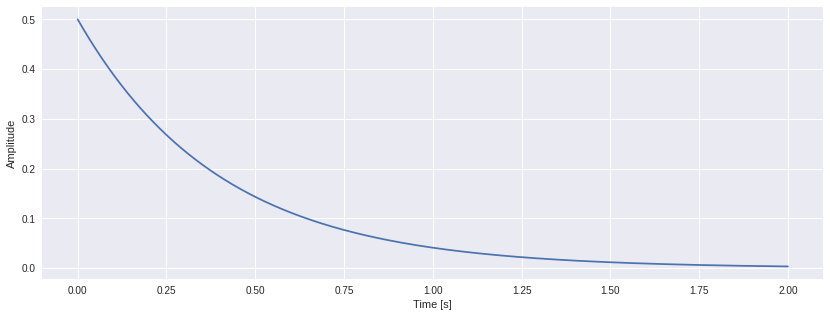

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize=(14,5))
plt.plot(time,envelope);
plt.xlabel('Time [s]');
plt.ylabel('Amplitude');

Generate a sawtooth wave by using scipy.signal to generates notes with the model

\begin{equation}
  x(t) = a(t) \textrm{sawtooth}(2\pi f_k t)
\end{equation}

where $a(t)$ is the envelope (see above) and $f_k$ the fundamental frequencies of the $k$-th pitch as in the table of Exercise 1.

Generate note signals for pitches A, C#, E and A$_2$:

In [ ]:
from scipy import signal
notes = np.array([f[0],f[4],f[7],f[-1]])
#A = f[0]
#C_sharp = f[4]  
#E = f[7]
#A2 = f[-1]

signals = np.zeros((len(notes),len(time)))

#we plot them for convenience
#plt.figure(figsize=(15,10));
for i in range(len(notes)):
    signals[i,:] = envelope*signal.sawtooth(2 * np.pi * notes[i] * time)
    #plt.subplot(2,2 ,i+1);
    #plt.plot(time, signals[i,:]);
    #plt.autoscale(enable=True, axis='both', tight=True);

Listen to each of the notes by importing "IPython.display as ipd"

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#this allows multiple outputs from a single cell

import IPython.display as ipd
for i in range(len(notes)):
  ipd.Audio(signals[i,:], rate=fs)

Generate a vector arpegio by concatenating the four notes:

In [ ]:
arpeggio = np.ravel(signals)
ipd.Audio(arpeggio, rate=fs)

# Here we do it analternatively with numpy concatenate
# signal_arpeggio = np.concatenate(signals , axis=0)
# ipd.Audio(signal_arpeggio, rate=fs)

Generate a vector chord made by summing up the four notes and dividing
them by 4 to avoid clipping:

In [ ]:
signals_single_vector = np.sum(signals,axis=0)/4
ipd.Audio(signals_single_vector, rate=fs)

### **Exercise 3**: Linking Colab to Google Drive and Uploading files to Colab

To link your Google Drive to Colab, use the following commands and follow the instructions. You will have to go to the link to retrieve the authorization code.

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

#We have uploaded files manually, without mounting our Google Drive 

If you are able to access Google Drive, your google drive files should be all under: $/content/gdrive/My Drive/

You should now have access to any file in your Google Drive. Additionally, you can upload files to the Colab Running Environment by using the interface on the left side.

**Note:** The files uploaded to Colab (that are not within your Google Drive folder) will be deleted upon disconnection.

Upload the provided file 'OSR_us_000_0010_8k.wav' via any of the above methods (direct uploading or Google drive access):

### **Exercise 4**: STFT Representation

Now that the file has been uploded, read it with librosa.load, show its sampling rate and its duration.

In [ ]:
import librosa
signal , sample_rate = librosa.load('/content/OSR_us_000_0010_8k.wav',sr=None)

print('Sample rate: ', sample_rate)
print('Signal duration', signal.shape[0]/sample_rate)

Sample rate:  8000
Signal duration 33.623125


Cut the signal to show only the third spoken sentence (from t=7 s to t = 10 s). Represent it with respect to time in seconds.

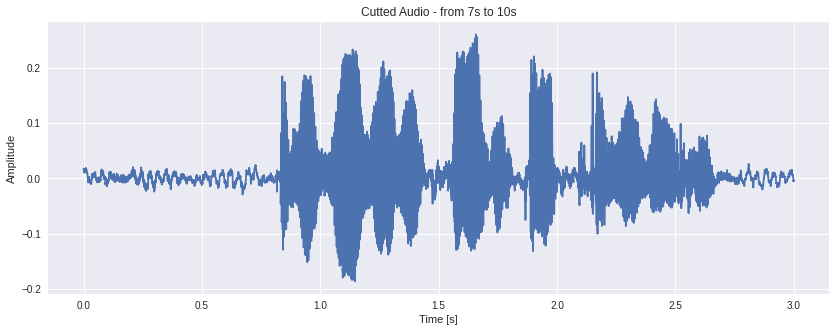

In [ ]:
signal = signal[7*sample_rate:10*sample_rate]
time = np.arange(0,signal.shape[0])/sample_rate
plt.figure(figsize=(14,5))
plt.plot(time,signal);
plt.xlabel('Time [s]');
plt.ylabel('Amplitude');
plt.title('Cutted Audio - from 7s to 10s');

In [ ]:
#Here we load the signal to the python player
ipd.Audio(signal, rate=sample_rate)
print(signal.shape)

(24000,)


Create a function "enframe" that takes as input:

*   signal (one-dimensional)
*   frame length (in samples)
*   hop size (in samples)

and returns a matrix where each column stores a frame of the signal. The function should pad the signal with zeroes if necessary.





In [ ]:
def enframe(signal, frame_length, hop_size):
  signal_length = signal.shape[0]
  # number of frames
  num_frames = int(np.ceil((signal_length - frame_length)/hop_size) + 1)
  
  #padding the signal if the number of frames do not fit the signal samples 
  pad_signal_length = (num_frames-1)*hop_size + frame_length
  z = np.zeros(pad_signal_length-signal_length)
  signal = np.append(signal,z)
  
  #creating the matrix of indeces
  indeces = np.tile(np.arange(0,frame_length), (num_frames, 1)).T + np.tile(np.arange(0, num_frames*hop_size, hop_size),(frame_length,1))
  
  #reshaping the signal using the indeces
  frames = signal[indeces]
  return frames

Divide the signal into frames of length 512, using a hop size of 256 samples. Show the dimensions of the output.

In [ ]:
frame_length= 512
hop_size = 256
frames = enframe(signal,frame_length,hop_size)
print(frames.shape)

(512, 93)


Plot the content of the 10-th frame:

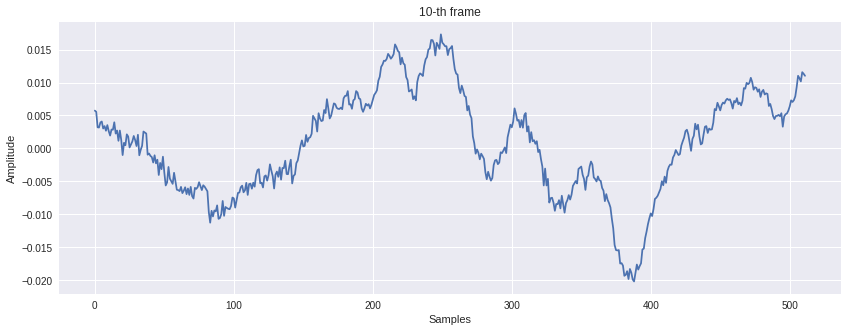

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(frames[:,10])
plt.xlabel('Samples');
plt.ylabel('Amplitude');
plt.title('10-th frame');

Create a Hamming function and apply it to each of your frames:

In [ ]:
winfunc = np.hamming(frame_length)
winfunc = np.expand_dims(winfunc,1) # this is done to match the dimensions between frame and window before multiplication
wframes = frames * winfunc

Plot again the 10-th frame after having applied your Hamming window:

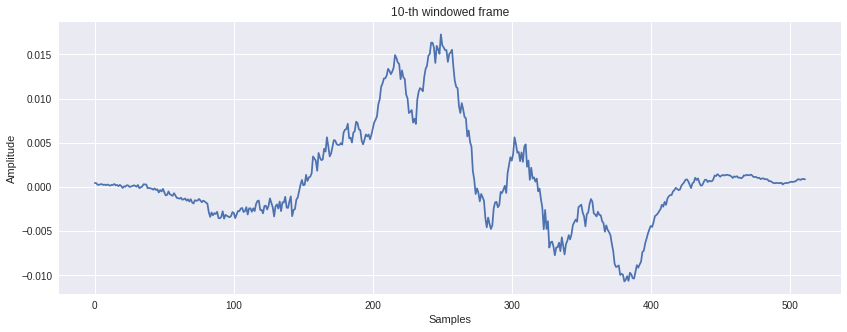

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(wframes[:,10])
plt.xlabel('Samples');
plt.ylabel('Amplitude');
plt.title('10-th windowed frame');

Compute the DFT of each column (frame) using numpy's rfft() function. Use as number of FFT points the same value as window length.

In [ ]:
NFFT = frame_length
mag_frames = np.abs(np.fft.rfft(wframes, NFFT, axis = 0))

Use the following function to represent the result with the indices of each frame and each frequency bin in the horizontal and vertical axes, respectively.



In [ ]:
def show_specgram(X,ratio,limits,cmin):
  '''This function represents matrix X within a figure having the desired
  aspect ratio. Input:
  X: matrix to represent
  ratio: aspect ratio of axes
  limits: array with [xmin, xmax, ymax, ymin] (y axis is reversed)
  cmin: minimum value corresponding to the bottom of the colormap scale.
  '''
  w, h = plt.figaspect(ratio);
  fig = plt.figure(figsize=(w*2, h*2))
  ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
  im = ax.imshow(X, extent = limits, cmap='viridis', interpolation='none')
  xleft, xright = ax.get_xlim()
  ybottom, ytop = ax.get_ylim()
  ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
  ax.invert_yaxis()
  if cmin != None:
    cbar = plt.colorbar(im)
    cbar.mappable.set_clim(cmin, None)
  return ax

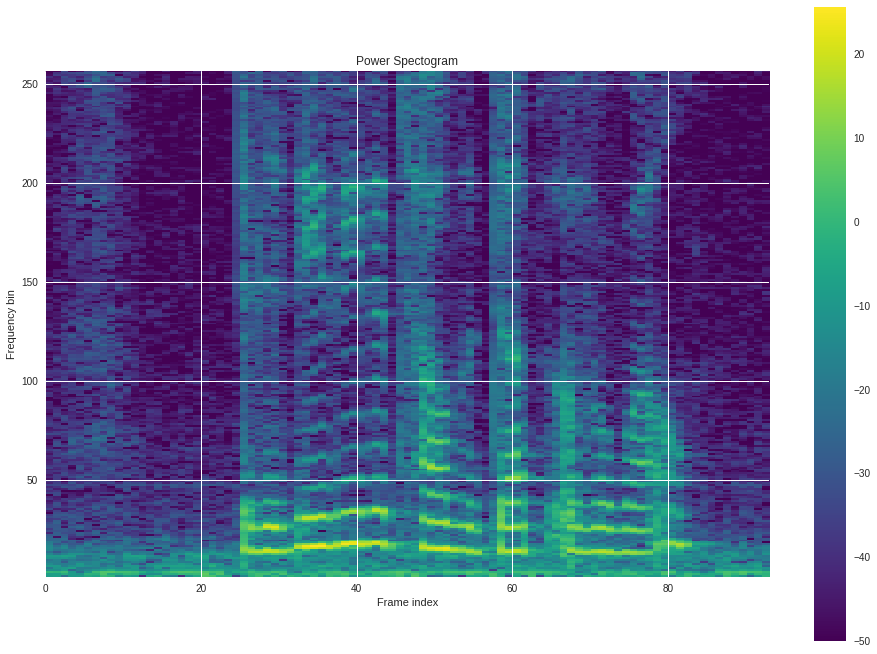

In [ ]:
num_frames = int(np.ceil((signal.shape[0] - frame_length)/hop_size) + 1)
Nbins = mag_frames.shape[0]

ax = show_specgram(10*np.log10(mag_frames**2),0.7,[0, num_frames,Nbins,1], cmin=-50)
ax.set_xlabel('Frame index');
ax.set_ylabel('Frequency bin');
ax.set_title('Power Spectogram');

Finally, represent again the spectrogram but as a function of the time in seconds and frequency in Hz.

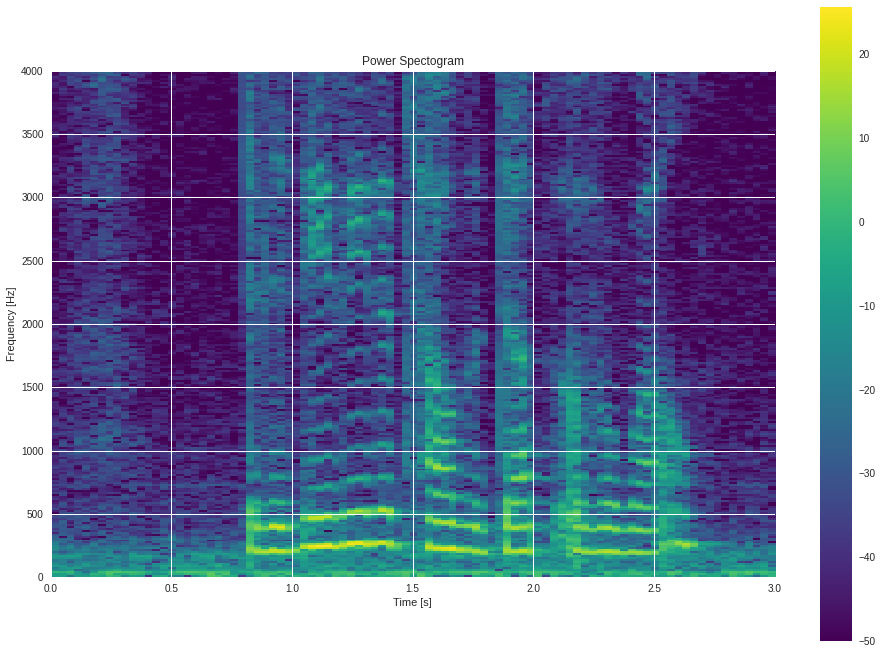

In [ ]:
f_bins = np.arange(0,Nbins)*(sample_rate)/NFFT
time_seconds = (signal.shape[0]/sample_rate)

ax = show_specgram(10*np.log10(mag_frames**2),0.7,[0, time_seconds,f_bins[-1],0], cmin=-50)
ax.set_xlabel('Time [s]');
ax.set_ylabel('Frequency [Hz]');
ax.set_title('Power Spectogram');

### **Exercise 5**: Librosa representations (STFT)

Use librosa to represent the power spectrogram of the signal, as we computed manually in the last exercise.

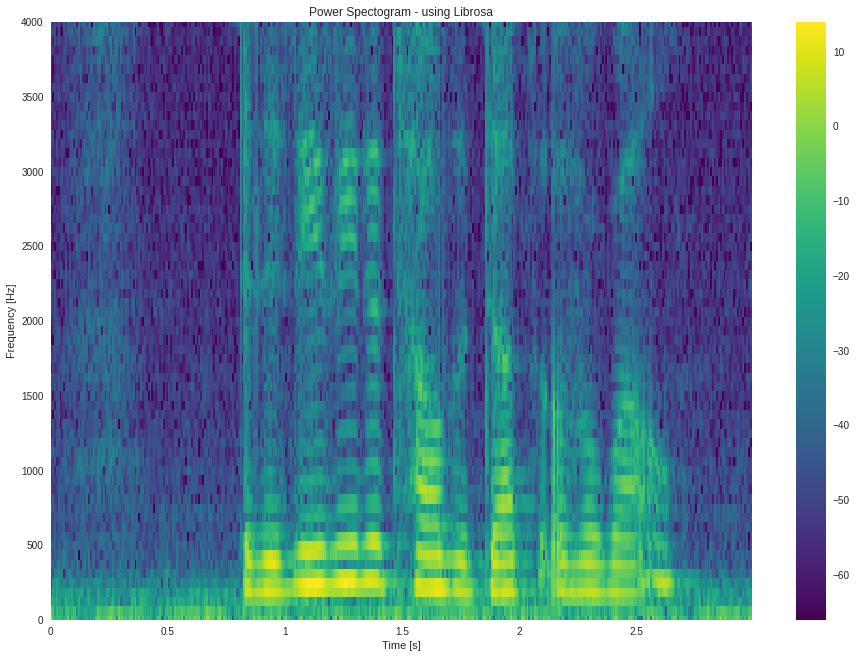

In [ ]:
import librosa.display

X = librosa.stft(signal, n_fft = NFFT, hop_length=hop_size, win_length=frame_length, window='hamming', center=False)

X_pow_db = librosa.power_to_db(np.abs(X)**2)

w, h = plt.figaspect(0.7);
plt.figure(figsize=(w*2,h*2));
librosa.display.specshow(X_pow_db , sr=sample_rate, hop_length=hop_size, x_axis='time', y_axis='linear' , cmap='viridis' );
plt.colorbar();
plt.xlabel('Time [s]');
plt.ylabel('Frequency [Hz]');
plt.title('Power Spectogram - using Librosa');

Experiment with different values of frame length and hop size and discuss the results.

**Case 1 - Decrease the frame length and hop size to 1/4 of the original value**

When we are using a shorter frame length we gain more time resolution, since we analyse the signal more frequently. But there is always a trade-off between temporal and spectral resolution. Therefore, using a shorter frame length we are losing frequency resolution, because the number of frequency bins in the DFT transformation are also shortened (i.e. number of frequency bins = number of analysis window time samples). 

This can be seen in the following graph, where the frequency trajectories are fatter/thiker having less accuracy on the exact frequency value. Instead the time axis has a higher analysis since the number of analysis frames is increased.

Time Analysis frames before: 93
Time Analysis frames after: 374


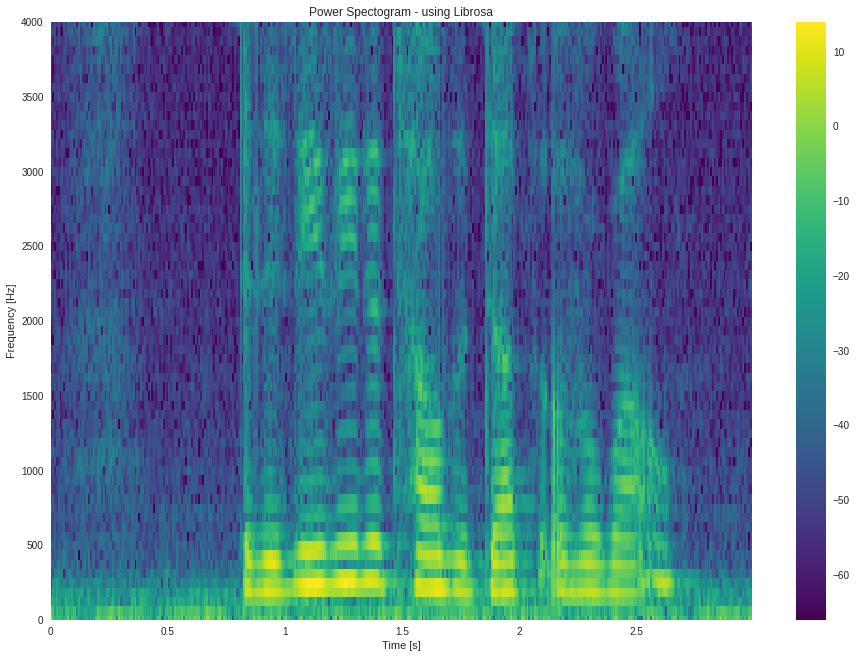

In [ ]:
# Initial frame and hop length and NFFT
frame_length = 512
hop_size = 256
num_frames = int(np.ceil((signal.shape[0] - frame_length)/hop_size) + 1)
NFFT = 512
print('Time Analysis frames before:' , num_frames)

# Decreasing frame and hope length at 1/4
frame_length = int(frame_length/4)
hop_size = int(hop_size/4)
NFFT = int(NFFT/4)
num_frames = int(np.ceil((signal.shape[0] - frame_length)/hop_size) + 1)
print('Time Analysis frames after:', num_frames)

X = librosa.stft(signal, n_fft = NFFT, hop_length=hop_size, win_length=frame_length, window='hamming', center=False)

X_pow_db = librosa.power_to_db(np.abs(X)**2)

w, h = plt.figaspect(0.7);
plt.figure(figsize=(w*2,h*2));
librosa.display.specshow(X_pow_db , sr=sample_rate, hop_length=hop_size, x_axis='time', y_axis='linear' , cmap='viridis' );
plt.colorbar();
plt.xlabel('Time [s]');
plt.ylabel('Frequency [Hz]');
plt.title('Power Spectogram - using Librosa');

**Case 2 - Increase the frame length and hop size to x2 of the original values**

Here we double the frame length and hop length size. By increasing the frame length, we increase the frequency resolution but we lose time resolution.
The frequency lines are more accurate, thinner lines.
The time axis samples are less accurate and wider, compared to the previous plot. 


Time Analysis frames before: 93
Time Analysis frames after: 46


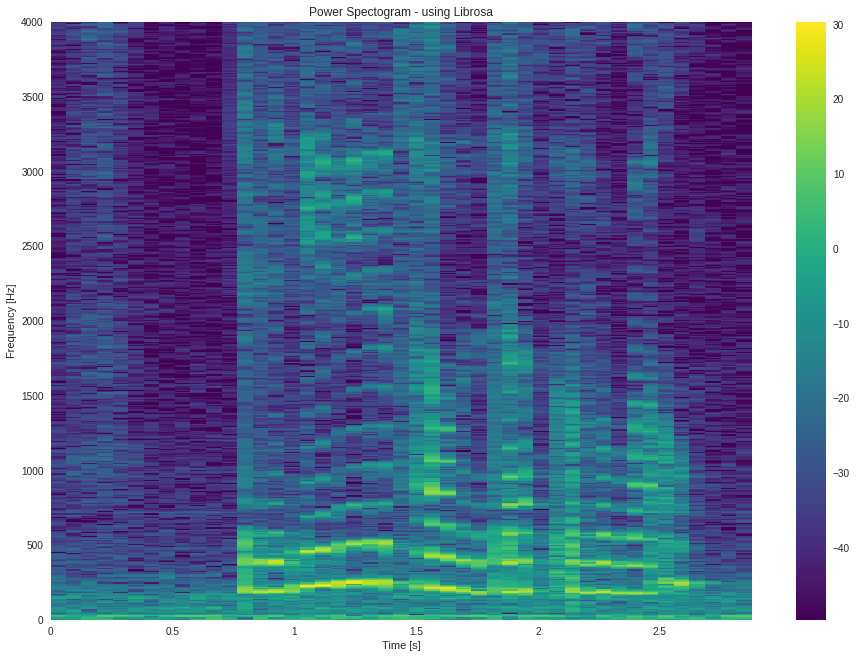

In [ ]:
# Initial frame and hop length
frame_length = 512
hop_size = 256
NFFT = 512
num_frames = int(np.ceil((signal.shape[0] - frame_length)/hop_size) + 1)
print('Time Analysis frames before:' , num_frames)

# Increasing frame and hop length *2
frame_length = int(frame_length*2)
hop_size = int(hop_size*2)
num_frames = int(np.ceil((signal.shape[0] - frame_length)/hop_size) + 1)
NFFT = NFFT*2
print('Time Analysis frames after:', num_frames)

X = librosa.stft(signal, n_fft = NFFT, hop_length=hop_size, win_length=frame_length, window='hamming', center=False)

X_pow_db = librosa.power_to_db(np.abs(X)**2)

w, h = plt.figaspect(0.7);
plt.figure(figsize=(w*2,h*2));
librosa.display.specshow(X_pow_db , sr=sample_rate, hop_length=hop_size, x_axis='time', y_axis='linear' , cmap='viridis' );
plt.colorbar();
plt.xlabel('Time [s]');
plt.ylabel('Frequency [Hz]');
plt.title('Power Spectogram - using Librosa');

**Case 3 - Increasing the frame length and decreasing the overlapping of frames simultaneously**

In this case we increase the frame length but at the same time we decrease the  overlapping of frames by setting the hop size to frame length ratio to 1/4.

The advantage in this configuration is that we increase the frequency resolution but we maintain the time resolution at the same level and not decreasing it, as we analyse each frame 4 times instead of 2

The disadvantage of this method is that it becomes computationally expensive as we analyze more overlapped frames.

Time Analysis frames before: 93
Hop size to frame legth ratio before: 0.5
Time Analysis frames after: 91
Hop size to frame legth ratio after: 0.25


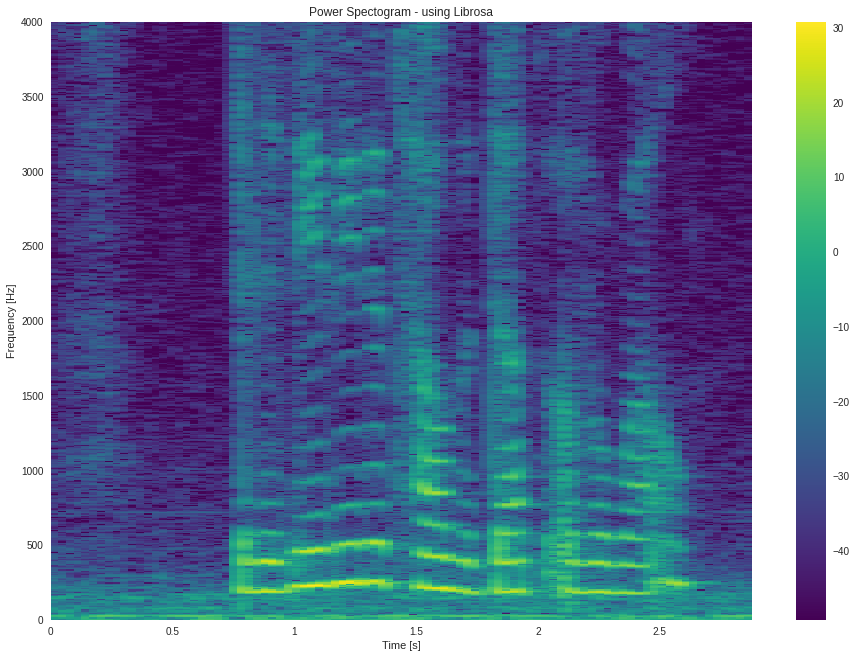

In [ ]:
# Initial frame and hop length
frame_length = 512
hop_size = 256
NFFT = 512
num_frames = int(np.ceil((signal.shape[0] - frame_length)/hop_size) + 1)
print('Time Analysis frames before:' , num_frames)
print('Hop size to frame legth ratio before:', float(hop_size/frame_length))

# Increasing the frame length *2 but hop size remains as is
frame_length = int(frame_length*2)
hop_size = int(hop_size)
NFFT = int(NFFT*2)
num_frames = int(np.ceil((signal.shape[0] - frame_length)/hop_size) + 1)
print('Time Analysis frames after:', num_frames)
print('Hop size to frame legth ratio after:', float(hop_size/frame_length))

X = librosa.stft(signal, n_fft = NFFT, hop_length=hop_size, win_length=frame_length, window='hamming', center=False)

X_pow_db = librosa.power_to_db(np.abs(X)**2)

w, h = plt.figaspect(0.7);
plt.figure(figsize=(w*2,h*2));
librosa.display.specshow(X_pow_db , sr=sample_rate, hop_length=hop_size, x_axis='time', y_axis='linear' , cmap='viridis' );
plt.colorbar();
plt.xlabel('Time [s]');
plt.ylabel('Frequency [Hz]');
plt.title('Power Spectogram - using Librosa');

### **Exercise 6**: Mel-Spectrograms

Compute the mel spectrogram using librosa. Experiment with different values of the parameters and discuss the results.

**Case 1 - Setting number of Mel bands to be generated as 40**

Take 40 mel bands is a typical number used as a best practice.

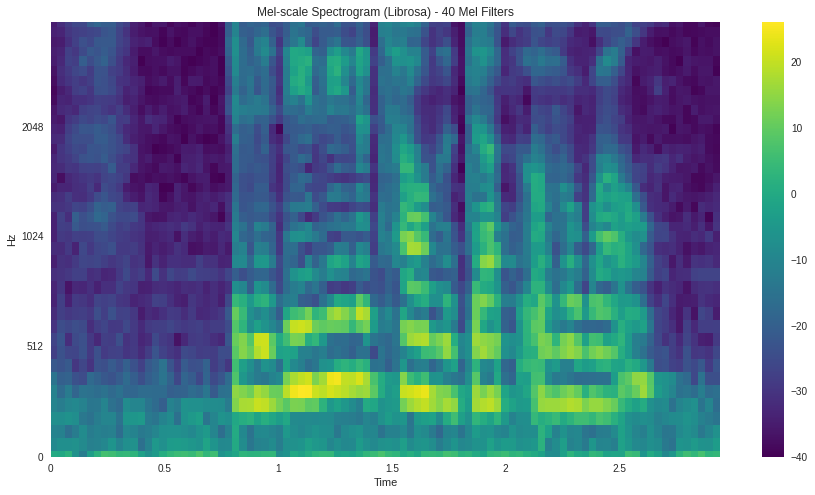

In [ ]:
# reseting original values of frame length and hop size
frame_length = 512
hop_size = 256
NFFT = 512
num_frames = int(np.ceil((signal.shape[0] - frame_length)/hop_size) + 1)

# reseting the experiment on stft
X = librosa.stft(signal, n_fft = NFFT, hop_length=hop_size, win_length=frame_length, window='hamming', center=False)
X_pow_db = librosa.power_to_db(np.abs(X)**2)

nfilt = 40
X_mel = librosa.feature.melspectrogram(sr=sample_rate, S = np.abs(X)**2 , n_fft=NFFT, hop_length=hop_size, n_mels=nfilt, fmin=0, fmax=sample_rate/2, htk = True, norm=None)


plt.figure(figsize=(15,8));
librosa.display.specshow(librosa.power_to_db(X_mel), sr=sample_rate, hop_length=hop_size, x_axis='time', y_axis='mel', fmax=sample_rate/2, cmap='viridis');
plt.clim(-40,None);
plt.colorbar();
plt.title('Mel-scale Spectrogram (Librosa) - 40 Mel Filters');

**Case 2 - Decreasing number of Mel bands to 10**

This setting affects the frequency resolution, since we are constracting a mel filterbank that covers the entire frequency axis using only 10 filters, thus each Mel filters has a wider bandwidth, which is less accurate. 


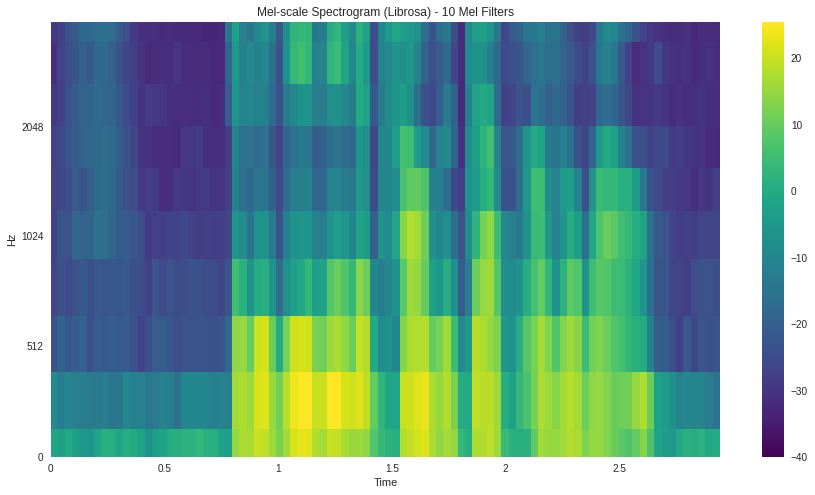

In [ ]:
nfilt = 10
X_mel = librosa.feature.melspectrogram(sr=sample_rate, S = np.abs(X)**2 , n_fft=NFFT, hop_length=hop_size, n_mels=nfilt, fmin=0, fmax=sample_rate/2, htk = True, norm=None)

plt.figure(figsize=(15,8));
librosa.display.specshow(librosa.power_to_db(X_mel), sr=sample_rate, hop_length=hop_size, x_axis='time', y_axis='mel', fmax=sample_rate/2, cmap='viridis');
plt.clim(-40,None);
plt.colorbar();
plt.title('Mel-scale Spectrogram (Librosa) - 10 Mel Filters');

Show the Mel-scale filterbank used in your last representation:

<Figure size 1080x576 with 0 Axes>

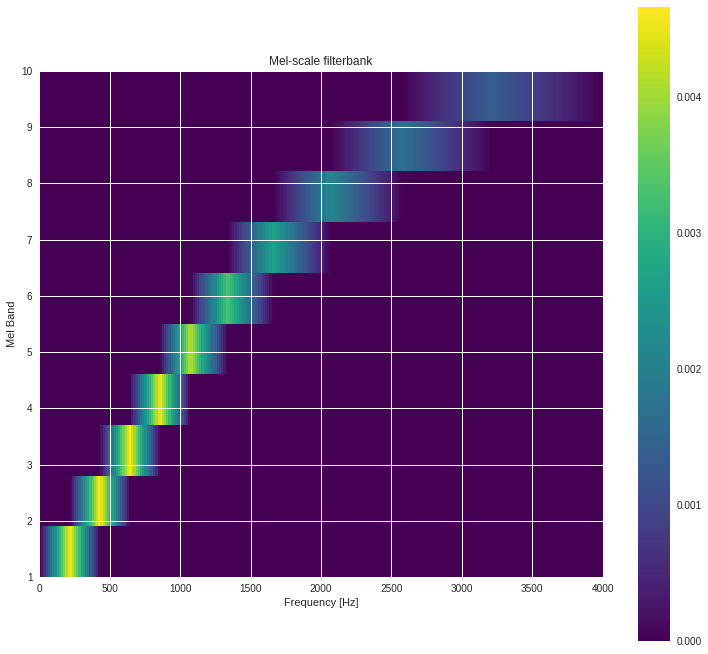

In [ ]:
# Showing the Mel-scale filterbank last representation with 10 Mel Filters
last_filter_bank = librosa.filters.mel(sr = sample_rate , n_fft=NFFT, n_mels=nfilt, fmax=sample_rate/2, fmin=0)
plt.figure(figsize=(15,8));
ax = show_specgram(last_filter_bank,0.9,[f_bins[0], f_bins[-1], nfilt, 1] , cmin=0)
ax.set_xlabel('Frequency [Hz]');
ax.set_ylabel('Mel Band');
ax.set_title('Mel-scale filterbank');

Now perform a similar analysis with a music signal ("oboe_c6.wav").


In [ ]:
signal2 , sample_rate2 = librosa.load('/content/oboe_c6.wav', sr=None)
ipd.Audio(signal2, rate=sample_rate2)

**Analysis of the oboe sound**

Because the oboe is a typical woodwind instrument, produces a highly harmonic (periodic) sound which can be seen clearly in the Mel spectrogram as a signal composed of straight and steady harmonic lines.

When using a low number of filters to construct the filterbank, the frequency  resolution is affected so that the harmonic lines are not clearly distinct any more.



**Case 1 - Setting number of Mel bands to be generated as 40**

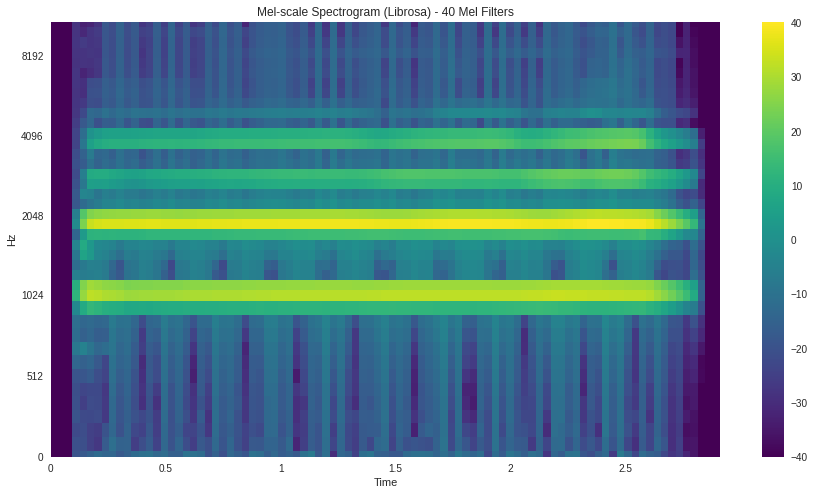

In [ ]:
X_2 = librosa.stft(signal2, n_fft = NFFT, hop_length=hop_size, win_length=frame_length, window='hamming', center=False)

nfilt = 40
X_2_mel = librosa.feature.melspectrogram(sr=sample_rate2, S = np.abs(X_2)**2 , n_fft=NFFT, hop_length=hop_size, n_mels=nfilt, fmin=0, fmax=sample_rate2/2, htk = True, norm=None)

plt.figure(figsize=(15,8));
librosa.display.specshow(librosa.power_to_db(X_2_mel), sr=sample_rate, hop_length=hop_size, x_axis='time', y_axis='mel', fmax=sample_rate2/2, cmap='viridis');
plt.clim(-40,None);
plt.colorbar();
plt.title('Mel-scale Spectrogram (Librosa) - 40 Mel Filters');

**Case 2 - Decreasing number of Mel bands to 10**

This setting will affect the frequency resolution as explained above. 

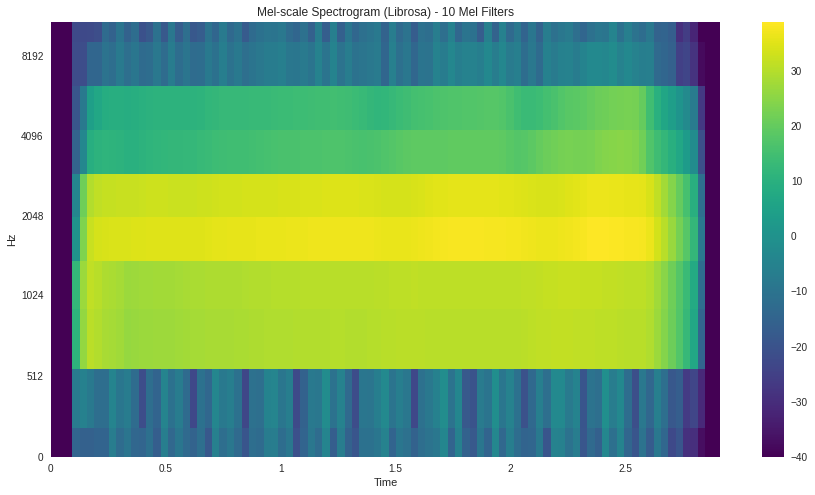

In [ ]:
nfilt = 10
X_2_mel = librosa.feature.melspectrogram(sr=sample_rate2, S = np.abs(X_2)**2 , n_fft=NFFT, hop_length=hop_size, n_mels=nfilt, fmin=0, fmax=sample_rate2/2, htk = True, norm=None)

plt.figure(figsize=(15,8));
librosa.display.specshow(librosa.power_to_db(X_2_mel), sr=sample_rate, hop_length=hop_size, x_axis='time', y_axis='mel', fmax=sample_rate2/2, cmap='viridis');
plt.clim(-40,None);
plt.colorbar();
plt.title('Mel-scale Spectrogram (Librosa) - 10 Mel Filters');

### **Exercise 7**: Constant-Q Transform

Compute the constant Q transform using librosa. 
Experiment with different values of the parameters and discuss the results.

**Case 1 - The default librosa.display.specshow parameter values.**

This default representation of the CQT is a limited graphical representation of the audio, because the signal we are analysing is C6 note with partials that goes above the C8 frequency limit of the graph (the default representation goes from minumum C1 to C8).


In [ ]:
x, sr = librosa.load('/content/oboe_c6.wav', sr=None)
C = librosa.cqt(x , sr=sr)

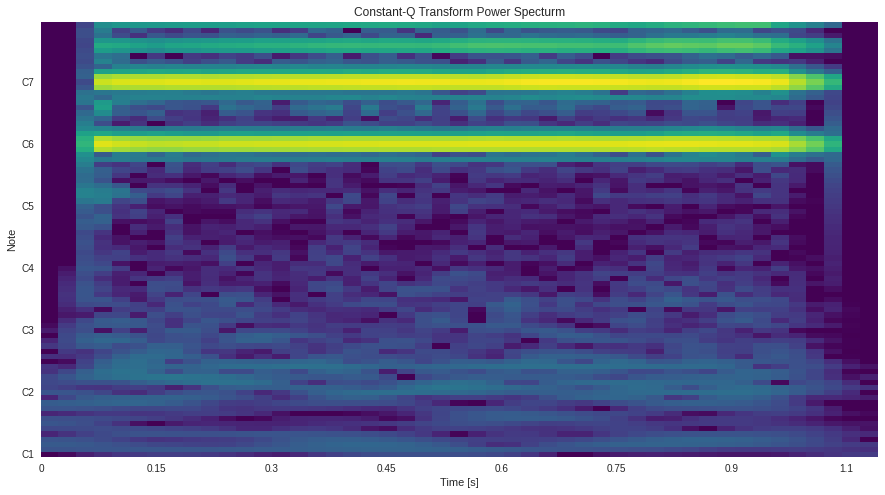

In [ ]:
logC = librosa.amplitude_to_db(np.abs(C))
plt.figure(figsize=(15,8));
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', cmap='viridis');
plt.xlabel('Time [s]');
plt.title('Constant-Q Transform Power Specturm');

**Case 2 - Limit the frequency range -  increasing `bins_per_octave`**

In this case we use as minimum frequency for the representation the C5 note, since the frequency components between C1 and C5 are absent.
The total range of notes in the representation is limited to the octaves given by the formula:

*Num of Octaves* =  `n_bins` / `bins_per_octave`

However, we have to use either a lower `n_bins` or a higher  `bins_per_onctave` in order not to exceed the Nyquist frequency in the representation, since the librosa implementation of the CQT computes the maximum frequency using the `n_bins` starting at `fmin`. 
The max admissible frequency is given by the following formula:

*Max Frequency*  = `fmin` * 2**(`n_bins` / `bins_per_octave`)

By augmenting the `bins_per_octave` from 12 to 24 we increase the resolution within an octave, because we divide the octave in more intervals. 







fmin is: 523.2511306011972
fmax is: 5919.91076338615
ratio: 11.313708498984761


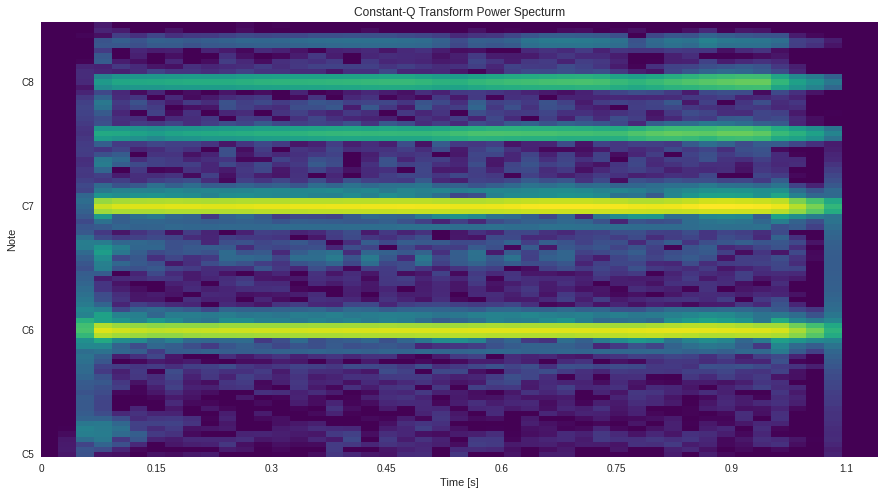

In [ ]:
fmin=librosa.note_to_hz('C5')
print('fmin is:', fmin)
n_bins = 84 #default 84
bins_per_octave= 24 #default 12
print('fmax is:', fmin * 2**(n_bins / bins_per_octave))
print('ratio:', 2**(n_bins / bins_per_octave)) #default 7
C = librosa.cqt(x , sr=sr , fmin=fmin, n_bins = n_bins, bins_per_octave=bins_per_octave)

logC = librosa.amplitude_to_db(np.abs(C));
plt.figure(figsize=(15,8));
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note',fmin=fmin, bins_per_octave=bins_per_octave, cmap='viridis');
plt.xlabel('Time [s]');
plt.title('Constant-Q Transform Power Specturm');

**Case 3 - Limit the frequency range - decrease the `n_bins`**

We use again as minimum frequency the C5, but in order not to exceed the Nyquist frequency while maintaining the `bins_per_octave` constant, we use a lower `n_bins`.

As a result of decreasing the `n_bins` we limit the number of octaves in the representation with respect to the default C1-C8 range while maintaining the default frequency resolution.

The frequency resolution may seem decreased but, this is an effect of zooming into a smaller octave range.

fmin is: 523.2511306011972
fmax is: 11175.303405856126
ratio: 21.357437666720553


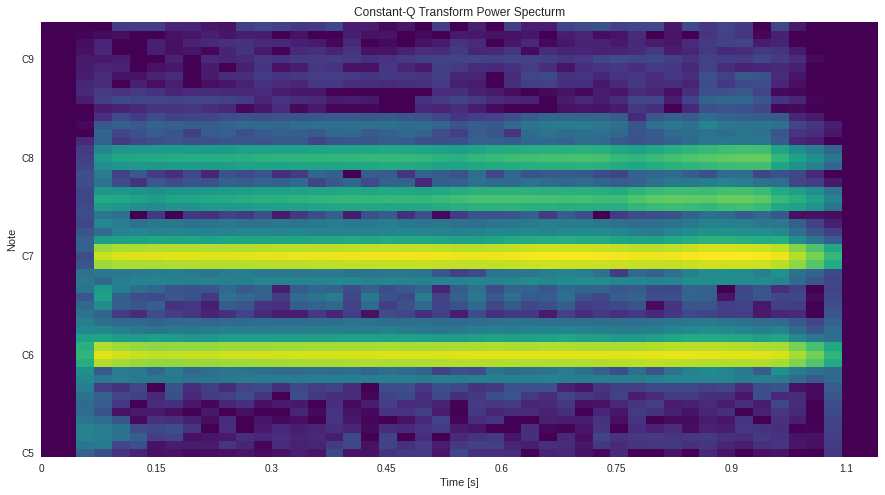

In [ ]:
fmin=librosa.note_to_hz('C5')
print('fmin is:', fmin)
n_bins = 53 #default 84
bins_per_octave= 12 #default 12
print('fmax is:', fmin * 2**(n_bins / bins_per_octave))
print('ratio:', 2**(n_bins / bins_per_octave))
C = librosa.cqt(x , sr=sr , fmin=fmin, n_bins = n_bins, bins_per_octave=bins_per_octave)

logC = librosa.amplitude_to_db(np.abs(C))
plt.figure(figsize=(15,8));
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note',fmin=fmin, bins_per_octave=bins_per_octave, cmap='viridis');
plt.xlabel('Time [s]');
plt.title('Constant-Q Transform Power Specturm');

### **Exercise 8**: MFCCs

Compute MFCCs using librosa. Experiment with different values of the parameters and discuss the results.

**Case 1 - Using the standard librosa.feature.mfcc function on the audio file OSR_us_000_0010_8k.wav**

- We compute the Mel scale filterbank using 40 filters.
- We compute the 13 first MFCCs of 40.

In practice, the first 13 MFCC coefficients are used to represent the shape of the spectrum, and up to 20 cepstral coefficients may be beneficial for speech signals.

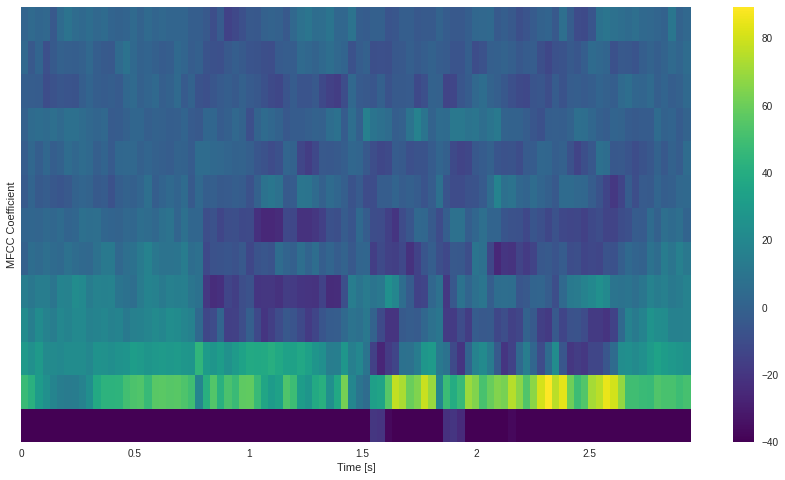

In [ ]:
signal, sample_rate = librosa.load('/content/OSR_us_000_0010_8k.wav', sr=None)
#cut the signal
signal = signal[7*sample_rate: 10*sample_rate]

NFFT = 512
frame_length = 512
n_mels = 40
num_ceps = 13
hop_length = 256

X = librosa.stft(signal, n_fft = NFFT, hop_length=hop_length, win_length=frame_length, window='hamming', center=False)

X_mel = librosa.feature.melspectrogram(sr=sample_rate, S = np.abs(X)**2, n_fft=NFFT, hop_length=hop_length, n_mels=n_mels, fmin=0, fmax=sample_rate/2, htk = True, norm=None)

X_mfcc = librosa.feature.mfcc(S=librosa.power_to_db(X_mel), sr = sample_rate, n_mfcc= num_ceps)

plt.figure(figsize=(15,8));
librosa.display.specshow(X_mfcc, sr=sample_rate, hop_length=hop_length, x_axis='time', cmap='viridis');
plt.clim(-40,None);
plt.colorbar();
plt.xlabel('Time [s]');
plt.ylabel('MFCC Coefficient');

**Case 2 - Increasing the number of components to get**



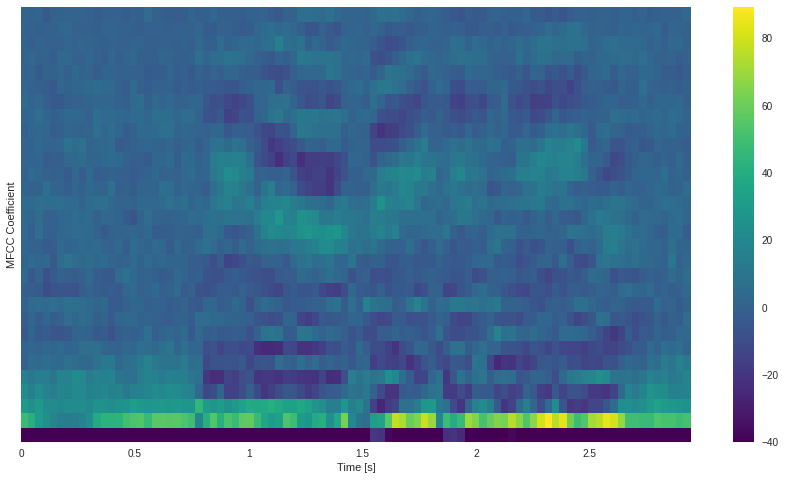

In [ ]:
num_ceps = 30
X_mfcc = librosa.feature.mfcc(S=librosa.power_to_db(X_mel), sr = sample_rate, n_mfcc= num_ceps)

plt.figure(figsize=(15,8));
librosa.display.specshow(X_mfcc, sr=sample_rate, hop_length=hop_length, x_axis='time', cmap='viridis');
plt.clim(-40,None);
plt.colorbar();
plt.xlabel('Time [s]');
plt.ylabel('MFCC Coefficient');

**Case 3 - Changing the coefficient weighting parameter `lifter`**

The lifter changes the contribution of the higher order coefficients. Since this is a speech signal, higher coefficients don't show a high value. 

However by getting all the coeffients and setting the `lifter` >=2* num_ceps , we enhance them and this can be seen in the following graph as a pattern, which may be useful for a classification task.



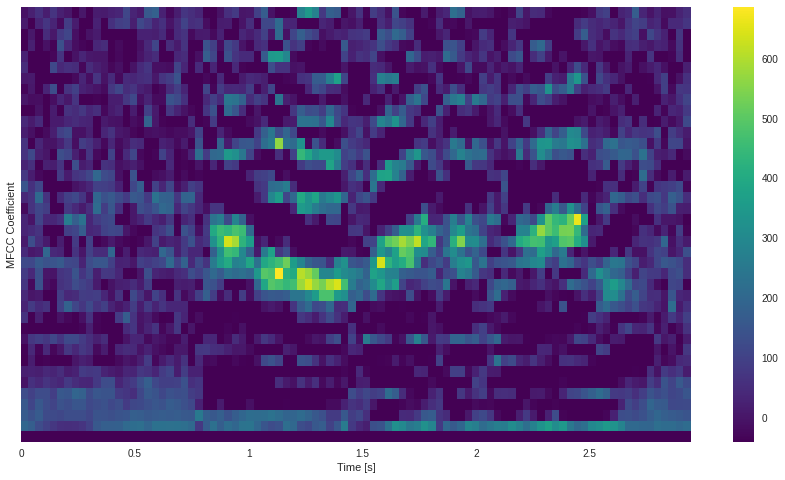

In [ ]:
num_ceps = 40
lifter = 2 * num_ceps 

X_mfcc = librosa.feature.mfcc(S=librosa.power_to_db(X_mel), sr = sample_rate, lifter = lifter, n_mfcc= num_ceps)

plt.figure(figsize=(15,8))
librosa.display.specshow(X_mfcc, sr=sample_rate, hop_length=hop_length, x_axis='time', cmap='viridis');
plt.clim(-40,None);
plt.colorbar();
plt.xlabel('Time [s]');
plt.ylabel('MFCC Coefficient');

**Case 4 - Comparing the oboe_c6.wav audio and simple_piano.wav sound**

We can see clearly the difference between the two sounds, the oboe pure harmonic than the piano quasi-harmonic.
In pure harmonic sound, energy exists continously in higher mel coefficients.

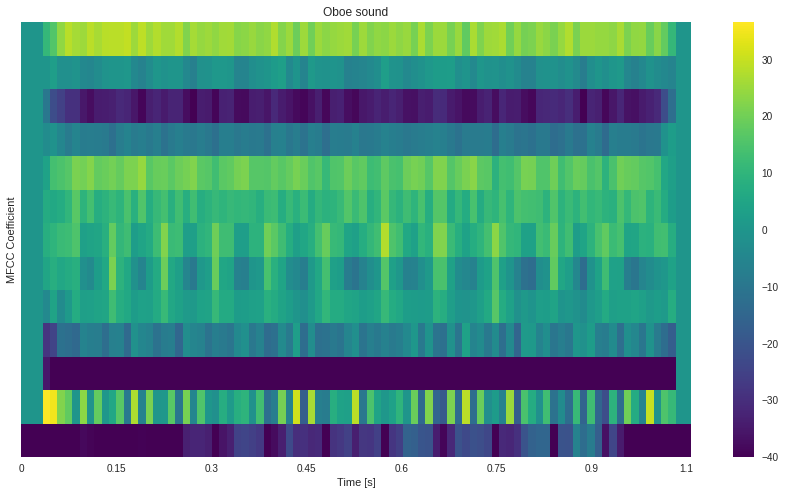

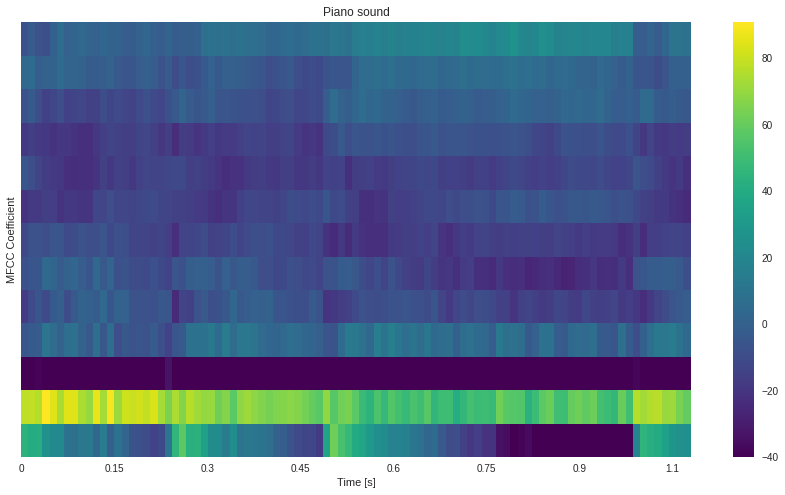

In [ ]:
signal2, sample_rate2 = librosa.load('/content/oboe_c6.wav', sr=None)
signal3, sample_rate3 = librosa.load('/content/simple_piano.wav', sr=None)

#cut the piano sound
signal3 = signal3[0:int(1.1*sample_rate3)]

NFFT = 512
frame_length = 512
n_mels = 40
num_ceps = 13
hop_length = 256

#signal2 - Oboe sound
X = librosa.stft(signal2, n_fft = NFFT, hop_length=hop_length, win_length=frame_length, window='hamming', center=False)
X_mel = librosa.feature.melspectrogram(sr=sample_rate2, S = np.abs(X)**2, n_fft=NFFT, hop_length=hop_length, n_mels=n_mels, fmin=0, fmax=sample_rate2/2, htk = True, norm=None)
X_mfcc = librosa.feature.mfcc(S=librosa.power_to_db(X_mel), sr = sample_rate2, n_mfcc= num_ceps)

plt.figure(figsize=(15,8));
librosa.display.specshow(X_mfcc, sr=sample_rate2, hop_length=hop_length, x_axis='time', cmap='viridis');
plt.clim(-40,None);
plt.colorbar();
plt.ylabel('MFCC Coefficient');
plt.xlabel('Time [s]');
plt.title('Oboe sound');

#signal3 - Piano sound
X = librosa.stft(signal3, n_fft = NFFT, hop_length=hop_length, win_length=frame_length, window='hamming', center=False)
X_mel = librosa.feature.melspectrogram(sr=sample_rate3, S = np.abs(X)**2, n_fft=NFFT, hop_length=hop_length, n_mels=n_mels, fmin=0, fmax=sample_rate3/2, htk = True, norm=None)
X_mfcc = librosa.feature.mfcc(S=librosa.power_to_db(X_mel), sr = sample_rate3, n_mfcc= num_ceps)

plt.figure(figsize=(15,8));
librosa.display.specshow(X_mfcc, sr=sample_rate3, hop_length=hop_length, x_axis='time', cmap='viridis');
plt.clim(-40,None);
plt.colorbar();
plt.ylabel('MFCC Coefficient');
plt.xlabel('Time [s]');
plt.title('Piano sound');

In [ ]:
#this cell is for printing purpose
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Student_Lab_1.ipynb')